In [192]:
import pandas as pd                           # Importing the libs
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [152]:
data=pd.read_csv('D:\\ExcelR\\Datasets\\delivery_time.csv')       # Reading the data
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [184]:
data.isnull().count()        # Checking for the null values

Delivery Time    21
Sorting Time     21
dtype: int64

In [170]:
d1=data.rename(columns={'Delivery Time': 'dt','Sorting Time': 'sot' })     # Renaming the column names

In [171]:
d1

,dt,sot
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [172]:
d1.corr()            # To find the correlation matrix

,dt,sot
dt,1.000000,0.825997
sot,0.825997,1.000000


<AxesSubplot:xlabel='dt', ylabel='sot'>

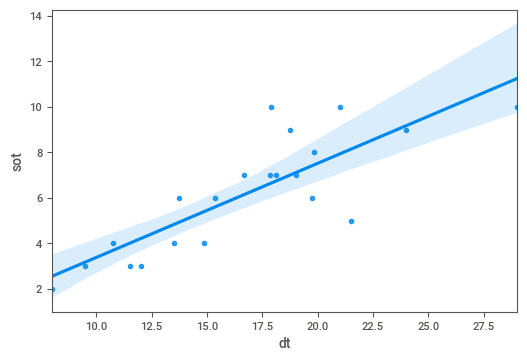

In [173]:
sns.regplot(x=d1['dt'],y=d1['sot'])

In [174]:
model=smf.ols('dt~sot',data=d1).fit()    #Fitting the model on the data

In [175]:
model

In [176]:
model.params

Intercept    6.582734
sot          1.649020
dtype: float64

In [177]:
model.tvalues

Intercept    3.823349
sot          6.387447
dtype: float64

In [178]:
model.pvalues

Intercept    0.001147
sot          0.000004
dtype: float64

In [196]:
dtime= 6.582734 + (1.649020*7) # delivery time prediction for the corresponding sorting time value of 7
                               # manual calculation for th sorting time value as 7

In [197]:
dtime

18.125874

In [198]:
newdata= pd.Series([7,10]) # prediction of delivery time for a set of corresponding sortime values
newdata

0     7
1    10
dtype: int64

In [199]:
ndata=pd.DataFrame(newdata,columns=['sorting time'])

In [200]:
ndata

,sorting time
0,7
1,10


In [201]:
model.predict(d1)       # prediction of delivery time for whole data set with respect to their sorting time valuesm

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Delivery time for the respective values of sorting time is predicted with a Simple Linear Regression Model